In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read_file = pd.read_excel("DS-Assignment Dataset and instructions/P3- Churn-Modelling Data.xlsx")
# read_file_to_csv("DS-Assignment Dataset and instructions/DS-Assignment Dataset and instructions/P3- Churn-Modelling Data.csv",index = None , header = True)
# data = pd.DataFrame(pd.read_excel("DS-Assignment Dataset and instructions/P3- Churn-Modelling Data.xlsx"))

In [3]:
data = pd.read_csv("DS-Assignment Dataset and instructions/P3- Churn-Modelling Data.csv")

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
Age_no = data['Age'].value_counts()
customer_distribution = (Age_no/10000)*100
customer_distribution 

37    4.78
38    4.77
35    4.74
36    4.56
34    4.47
      ... 
92    0.02
82    0.01
88    0.01
85    0.01
83    0.01
Name: Age, Length: 70, dtype: float64

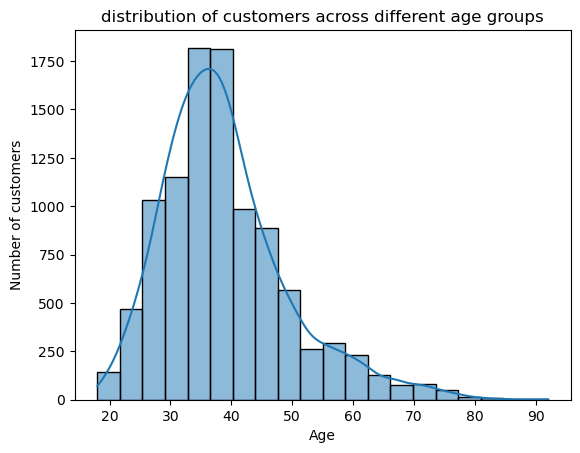

In [6]:
sns.histplot(data['Age'],bins = 20,kde = True)
plt.title("distribution of customers across different age groups")
plt.xlabel("Age")
plt.ylabel("Number of customers")
plt.show()

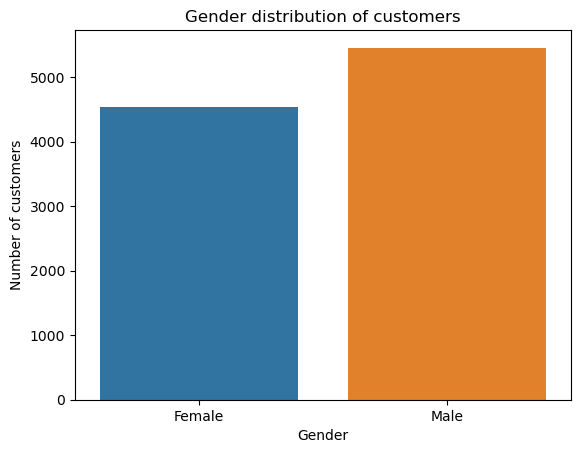

In [7]:
sns.countplot(x = 'Gender',data = data,)
plt.title("Gender distribution of customers")
plt.xlabel("Gender")
plt.ylabel("Number of customers")
plt.show() 

In [8]:
Gender_no = data['Gender'].value_counts()
gender_distribution = (Gender_no/10000)*100
gender_distribution

Male      54.57
Female    45.43
Name: Gender, dtype: float64

In [21]:
Ghorbd  = data.mean()

C:\Users\USER\AppData\Local\Temp\ipykernel_8524\3311276590.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Ghorbd  = data.mean()


In [9]:
churn_rate = data['churned'].mean() * 100
print(f'{churn_rate:.2f}%')

20.37%


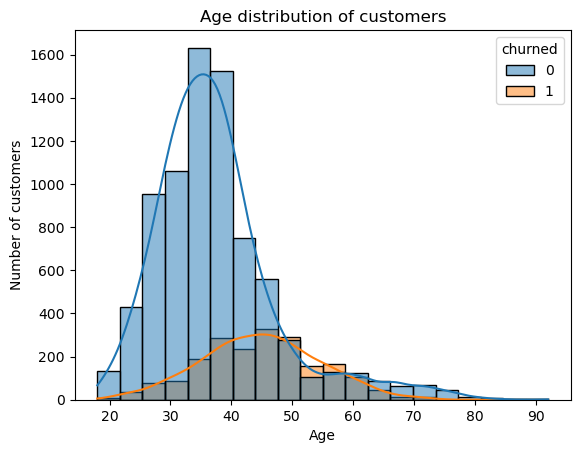

In [10]:
sns.histplot(data = data,hue = "churned",x = "Age",bins = 20,kde = True)
plt.title("Age distribution of customers")
plt.xlabel("Age")
plt.ylabel("Number of customers")
plt.show()

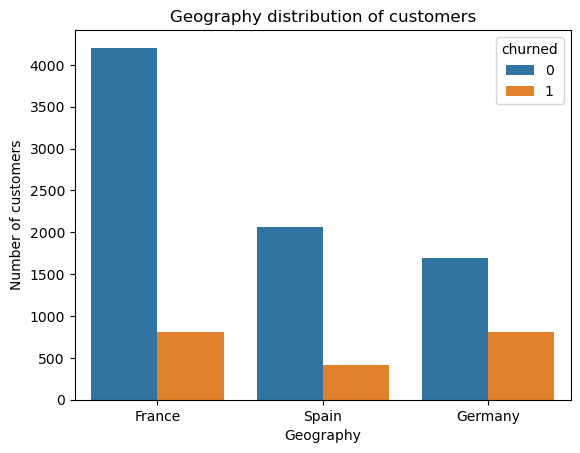

In [11]:
sns.countplot(data = data,hue = "churned",x = "Geography",)
plt.title("Geography distribution of customers")
plt.xlabel("Geography")
plt.ylabel("Number of customers")
plt.show()  

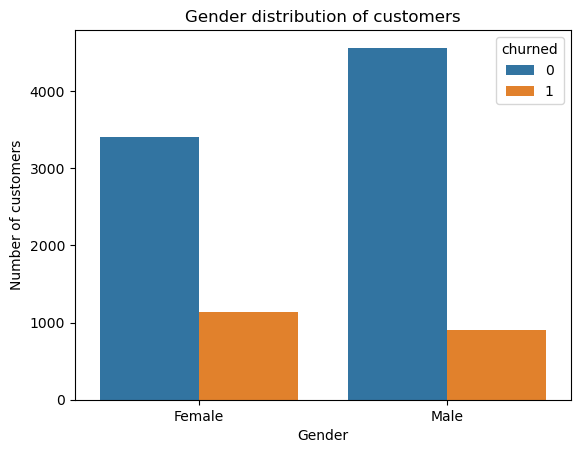

In [12]:
sns.countplot(x = 'Gender',data = data,hue = "churned")
plt.title("Gender distribution of customers")
plt.xlabel("Gender")
plt.ylabel("Number of customers")
plt.show()

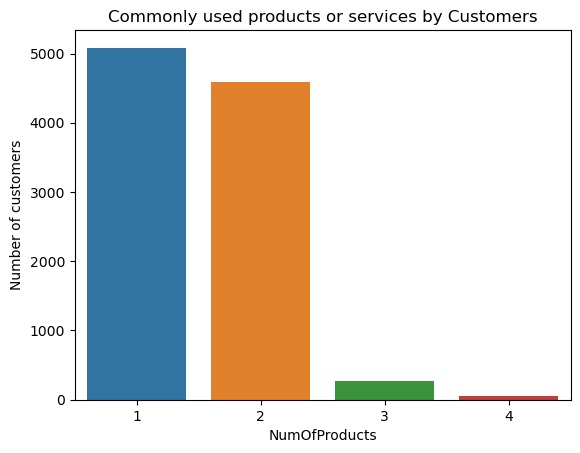

In [13]:
# commonly used products or services
sns.countplot(data = data,x = "NumOfProducts",)
plt.title("Commonly used products or services by Customers")
plt.xlabel("NumOfProducts")
plt.ylabel("Number of customers")
plt.show() # Plotting using matplotlib

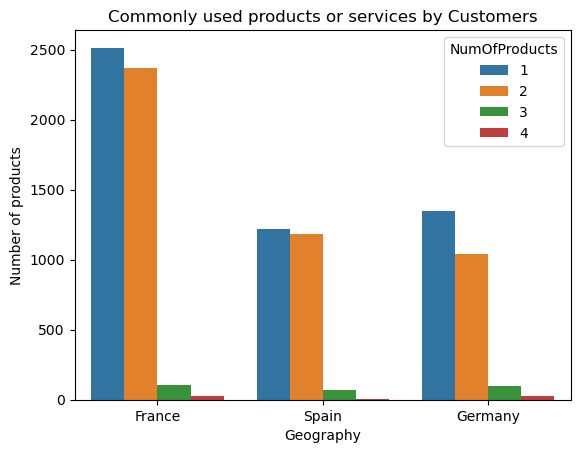

In [14]:
#Patterns of different customer products by geography

sns.countplot(data = data, x = "Geography",hue = "NumOfProducts")
plt.title("Commonly used products or services by Customers")
plt.xlabel("Geography")
plt.ylabel("Number of products")
plt.show() 

In [15]:
# 4
Average_acc_balance = data["Balance"].mean()
print(f'Average_acc_balance:{Average_acc_balance: 2f}%') 

Average_acc_balance: 76485.889288%


Text(0.5, 1.0, 'Balance Distribution of Churned vs Non-Churned Customers')

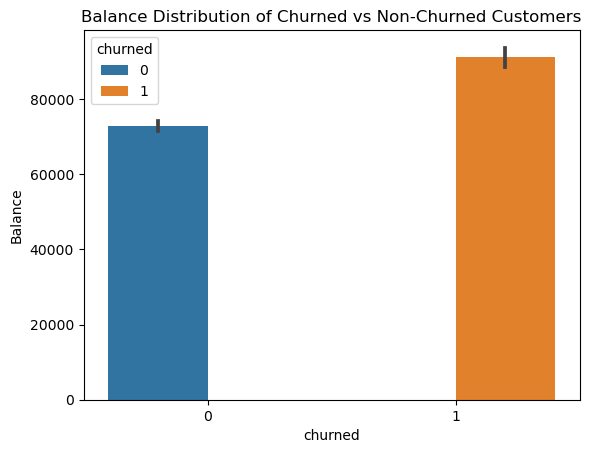

In [16]:
sns.barplot(data = data,x = "churned",y = "Balance",hue = "churned",)
plt.title("Balance Distribution of Churned vs Non-Churned Customers")

In [17]:
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# Prepare the data
X = data.drop(['CustomerId', 'Surname', 'RowNumber', 'churned'], axis=1)
X = pd.get_dummies(X, drop_first=True)
y = data['churned']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.30       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Accuracy: 0.81


In [19]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1607
           1       0.63      0.36      0.46       393

    accuracy                           0.83      2000
   macro avg       0.74      0.65      0.68      2000
weighted avg       0.81      0.83      0.81      2000

Accuracy: 0.83
